# Notebook - analiza danych

- Przeprowadzimy analizę danych dla każdego pliku z osobna, w celu wyłapania ewentualnych błedów w danych
  oraz ocenienia ich użyteczności
- Scalimy piki w jeden zbiór, a następnie zbadamy jego właściwości
- Na podstawie tej analizy zaproponujemy, wyjściowy zbiór, który zostanie użyty w dalszy etapach implementacji naszego rozwiązania.

Inicializacja środowiska.

Notebook korzysta z modułów pandas, matplotli, seaborn, które można "dociągnąc" przy pomocy pip3

pip3 install [module]

Inicializacja środowiska.

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

userDataPath = '../data/raw/users.jsonl'
productDataPath = '../data/raw/products.jsonl'
purchaseDataPath = '../data/raw/purchases.jsonl'
sessionsDataPath = '../data/raw/sessions.jsonl'


usersDF = pd.read_json(userDataPath, lines = True)
productsDF = pd.read_json(productDataPath, lines = True)
purchasesDF = pd.read_json(purchaseDataPath, lines = True)
sessionsDF = pd.read_json(sessionsDataPath, lines = True)

## Analiza produktów

In [243]:
productsDF.head(n=5)

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99


Wyróżniamy product_id, product_name, category_path oraz price.
Szczególnie powinniśmy się przyjrzeć polu **category_path**.
Reprezentuje hierarchiczną strukturę kategorii. Patrząc od lewej do prawej, mamy najogólniejsze zkategoryzowanie kończąc na najbardziej szczegółowym. 

In [244]:
productsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     319 non-null    int64  
 1   product_name   319 non-null    object 
 2   category_path  319 non-null    object 
 3   price          319 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ KB


Widzimy, że w żadnym atrybucie nie ma pustych pól, możemy o tym wnioskować z faktu, że ilość rekordów (319 : entries)  jest równa każdej z wartości w kolumnie non-null count.

Analiza **product_id**

In [245]:
print('max id : {}'.format(productsDF['product_id'].max()))
print('min id : {}'.format(productsDF['product_id'].min()))
print('unique ids : {}/{}'.format(productsDF['product_id'].nunique(), productsDF['product_id'].size))

max id : 1319
min id : 1001
unique ids : 319/319


**product_id** jest z liczbą całkowitą z przedziału [1001 - 1319].
Widzimy również, że wszystkie id są unikalne, więc nie będziemy mieć problemu z niejdnoznacznością w przyadku produktów.

Analiza **product_name**

In [246]:
print('unique names : {}/{}'.format(productsDF['product_name'].nunique(), productsDF['product_name'].size))

unique names : 319/319


Wszystkie nazwy produktów są unikatowe.

Analiza **category_path**

In [247]:
print(
    productsDF['category_path']
        .drop_duplicates()
        .sort_values()
        .to_string(index=False)
) 

                                    Gry i konsole;Gry komputerowe
                    Gry i konsole;Gry na konsole;Gry PlayStation3
                        Gry i konsole;Gry na konsole;Gry Xbox 360
   Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne
                                  Komputery;Monitory;Monitory LCD
                            Komputery;Tablety i akcesoria;Tablety
                                       Sprzęt RTV;Audio;Słuchawki
         Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4
                                 Sprzęt RTV;Video;Odtwarzacze DVD
               Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV
               Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące
  Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe
                          Telefony i akcesoria;Telefony komórkowe
                        Telefony i akcesoria;Telefony stacjonarne


Zbiór wszystkich unikalnych kategoryzacji występujących w naszych danych. Wartos sprawdzić jak wygląda liczność każdej z kategorii.

In [248]:
productsDF.groupby('category_path')['product_id'].count().sort_values()

category_path
Sprzęt RTV;Audio;Słuchawki                                             1
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D                     1
Telefony i akcesoria;Telefony stacjonarne                              1
Komputery;Tablety i akcesoria;Tablety                                  2
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4               2
Sprzęt RTV;Video;Odtwarzacze DVD                                       2
Telefony i akcesoria;Telefony komórkowe                                2
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe        4
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące      5
Gry i konsole;Gry na konsole;Gry PlayStation3                          9
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne         9
Komputery;Monitory;Monitory LCD                                       17
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                    30
Gry i konsole;Gry na konsole;Gry Xbox

Widzimy, że bardzo liczną grupą jest **'Gry i konsole;Gry komputerowe**. Nie jesteśmy w stanie podzielić jej na mniejsze, ale możemy spróbować scalić grupy o wspónych 'prefikasch'.

In [249]:
productsDF['category_path'].drop_duplicates().sort_values(ignore_index=True)

0                                         Gry i konsole;Gry komputerowe
1                         Gry i konsole;Gry na konsole;Gry PlayStation3
2                             Gry i konsole;Gry na konsole;Gry Xbox 360
3        Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne
4                                       Komputery;Monitory;Monitory LCD
5                                 Komputery;Tablety i akcesoria;Tablety
6                                            Sprzęt RTV;Audio;Słuchawki
7              Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4
8                                      Sprzęt RTV;Video;Odtwarzacze DVD
9                    Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV
10                   Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D
11    Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące
12      Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe
13                              Telefony i akcesoria;Telefony ko

Łatwiej będzie nam zrzutować posortowane kategorie.

Sensownym było by wyróżnić 5 categorii o następujących licznościach:
- 'Gry komputerowe' : 202 
- 'Gry na konsole' : 41
- 'Sprzęt RTV' : 36
- 'Komputery' : 28
- 'Telefony i akcesoria' :  12

In [250]:
groups = [
    'Gry komputerowe',
    'Gry na konsole', 
    'Sprzęt RTV', 
    'Komputery', 
    'Telefony i akcesoria'
    ]

def castCategory(category_path):
    categories = category_path.split(';')
    casts = [sub_category for sub_category in categories if sub_category in groups]
    if (len(casts) != 1):
        raise RuntimeError('number of casts should be 1 but is : {}'.format(casts))
    return casts[0]

productsDF_processed_groups = productsDF['category_path'].apply(castCategory)
productsDF_processed = productsDF.copy()

productsDF_processed['category_path'] = productsDF_processed_groups

productsDF_processed_groups.value_counts()

Gry komputerowe         202
Gry na konsole           41
Sprzęt RTV               36
Komputery                28
Telefony i akcesoria     12
Name: category_path, dtype: int64

In [251]:
productsDF_processed.head(n=5)

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria,58.97
1,1002,Kyocera FS-1135MFP,Komputery,2048.50
2,1003,Kyocera FS-3640MFP,Komputery,7639.00
3,1004,Fallout 3 (Xbox 360),Gry na konsole,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry na konsole,49.99


Wynik rzutowania zgadza zgadza się z naszymi wstępnymi szacunkami.

Analiza **price**

max price : 7639.0
max price : 1.0
mean price : 247.78796238244504
median price : 41.0


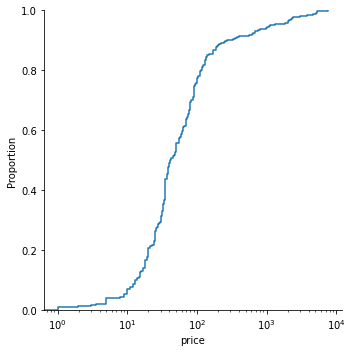

In [252]:
print('max price : {}'.format(productsDF['price'].max()))
print('max price : {}'.format(productsDF['price'].min()))
print('mean price : {}'.format(productsDF['price'].mean()))
print('median price : {}'.format(productsDF['price'].median()))

sbn.displot(data=productsDF, x='price', kind='ecdf', log_scale=True)


<AxesSubplot:xlabel='price'>

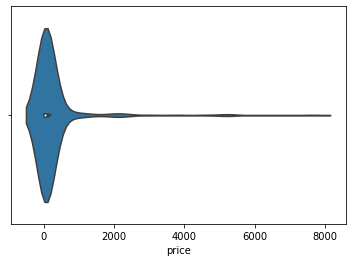

In [253]:
sbn.violinplot(data=productsDF, x='price')

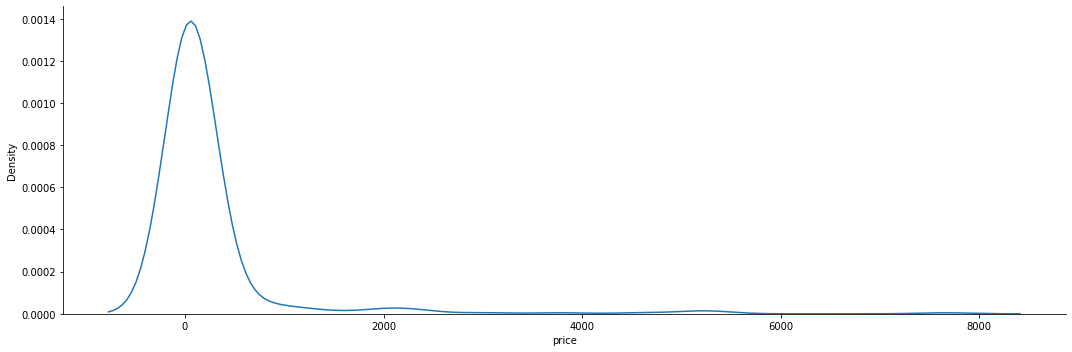

In [254]:
sbn.displot(data=productsDF, x='price', kind='kde', aspect=3,)


Po dystrybuancie widzimy, że większość cen produktów znajduje się w przedziale [0, 300], około 90%.

## Analiza użytkowników

In [255]:
usersDF.head(n=5)

,user_id,name,city,street
0,102,Ernest Zacharek,Radom,ul. Bukowa 64
1,103,Tomasz Elwart,Gdynia,ul. Bałtycka 29
2,104,Jakub Machowiak,Poznań,pl. Nałkowskiej 64/51
3,105,Jan Kaziród,Wrocław,plac Borowa 70
4,106,Adrianna Pera,Radom,aleja Wiązowa 30/27


Rekord użytkownika zawiera pola user_id, name, city, street

In [256]:
usersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  200 non-null    int64 
 1   name     200 non-null    object
 2   city     200 non-null    object
 3   street   200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


Brak pustych pól w zbiorze użytkowników.

Analiza **user_id**

In [257]:
print('max id : {}'.format(usersDF['user_id'].max()))
print('min id : {}'.format(usersDF['user_id'].min()))
print('unique ids : {}/{}'.format(usersDF['user_id'].nunique(), usersDF['user_id'].size))

max id : 301
min id : 102
unique ids : 200/200


Id są z liczbami całkowitymi z przedziału [102, 301]. Nie mam żadnych duplikatów. Jeżeli nazwy użytkowników będą unikalne będziemy mieć pewność, że nie mamy niejednoznaczności dotyczącej użytkownika.

In [258]:
print('unique names : {}/{}'.format(usersDF['name'].nunique(), usersDF['user_id'].size))

unique names : 199/200


In [259]:
usersDF[usersDF['name'].duplicated(keep=False)]

,user_id,name,city,street
102,204,Fryderyk Pospiech,Radom,al. Piastowska 50
158,260,Fryderyk Pospiech,Wrocław,pl. Akacjowa 25


Imiona nie są unikatowe. Wygląda na to, że klient pozwala na zakładanie wielu kont dla jednej osoby.
Wydaje się, że nie jest to problemem, warto również wspomnieć, że wartość name raczej nie będzie użyteczna w procesie trenowania modelu.

Analiza **city**

Warto sprawdzić, czy użytkownicy są reprezentatwyną grupą w kontekście działalności obszaru działalności klienta. Chcielibyśmy by model działał poprawnie dla wszystkich, miast w których operuje ESzopping, więc liczymy na to, że użytkownicy będą rozłożeni w równolicznych grupach.

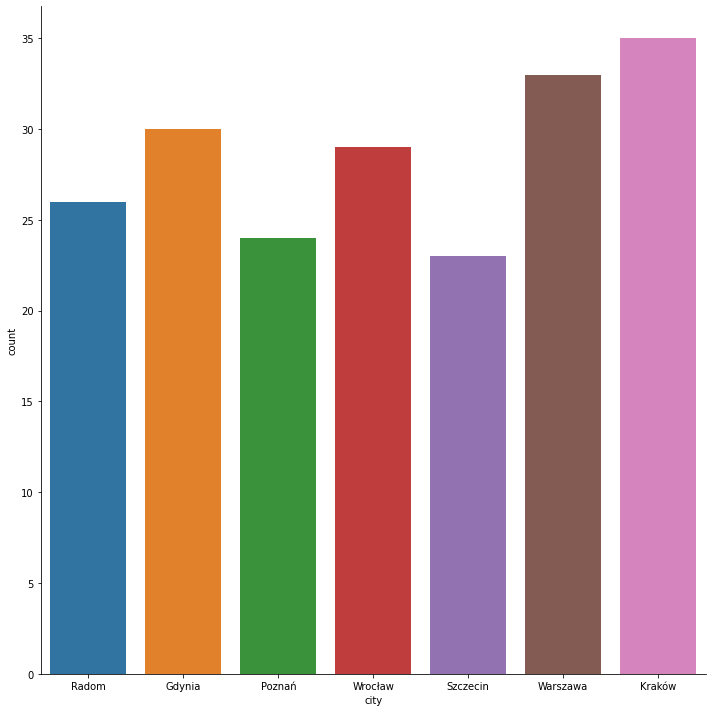

In [260]:
sbn.catplot(data=usersDF, kind='count', x='city', height=10)

Pomijając delikatną przewagę Warszawy i Krakowa mad resztą 'stawki', nie widzimy poważnych niereguralności w mieście zamieszkania użytkowników.
 

Analiza **street**

In [261]:
print('unique streets : {}/{}'.format(usersDF['street'].nunique(), usersDF['user_id'].size))

unique streets : 200/200


Wszystkie nazwy ulic są unikatowe.

Możliwe, że powinniśmy zrzutować konkretne adresy na coś bardziej ogólnego, pokrywającego większy obszar, np. dzielnicę.
Przydałoby się również geograficzne położenie stacji nadawczych firm kurierskich. Niestety, prawdopodobnie nie będziemy dysponować
takimi danymi. Zastosowanie takiego rzutowania może sprawić, że model będzie bardziej elastyczny.


Niemniej jednak, **street** i **city** będą ważnymi atrybutami dla naszego modelu. Nie trudno się domyśleć, że adres doręczenia przesyłki będzie grał ważną rolę przy predykcji.

## Analiza zakupów

In [262]:
purchasesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031 entries, 0 to 7030
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   purchase_id         7031 non-null   int64 
 1   purchase_timestamp  7031 non-null   object
 2   delivery_timestamp  7031 non-null   object
 3   delivery_company    7031 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 219.8+ KB


Rekordy są kompletne.
Sprawdźmy jakie dane są zapisane w rekordach.

In [263]:
purchasesDF.head(n=5)

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-09-20T14:30:28,2021-09-22T08:36:20.150497,360
1,20002,2021-03-05T13:27:41,2021-03-08T08:00:32.317562,620
2,20003,2021-07-28T13:44:26,2021-07-30T12:01:54.224889,360
3,20004,2021-09-01T18:54:49,2021-09-03T08:09:57.431414,360
4,20005,2021-09-11T12:33:54,2021-09-13T08:42:19.687349,360


Atrybuty **purchase_id** oraz **delivery_company** są identyfikatorami, więc łatwo będzie je przeanalizować.
**purchase_timestamp** i **delivery_timestamp**, a wręcz ich różnica będzie przedmiotem predykcji, więc warto będzie przyjrzeć się tym atrybutom trochę bliżej.

Analiza **purchase_id**

In [264]:
print('max id : {}'.format(purchasesDF['purchase_id'].max()))
print('min id : {}'.format(purchasesDF['purchase_id'].min()))
print('unique ids : {}/{}'.format(purchasesDF['purchase_id'].nunique(), purchasesDF['purchase_id'].size))

max id : 27031
min id : 20001
unique ids : 7031/7031


Id są unikatowe oraz w pełni pokrywają przedział [20001, 27031].

Analiza **delivery_company**

In [265]:
print('max id : {}'.format(purchasesDF['delivery_company'].max()))
print('min id : {}'.format(purchasesDF['delivery_company'].min()))
print('unique ids : {}/{}'.format(purchasesDF['delivery_company'].nunique(), purchasesDF['purchase_id'].size))

max id : 620
min id : 360
unique ids : 3/7031


Widzimy, że ESzopping współpracuje jedynie z 3 firmami kurierskimi.

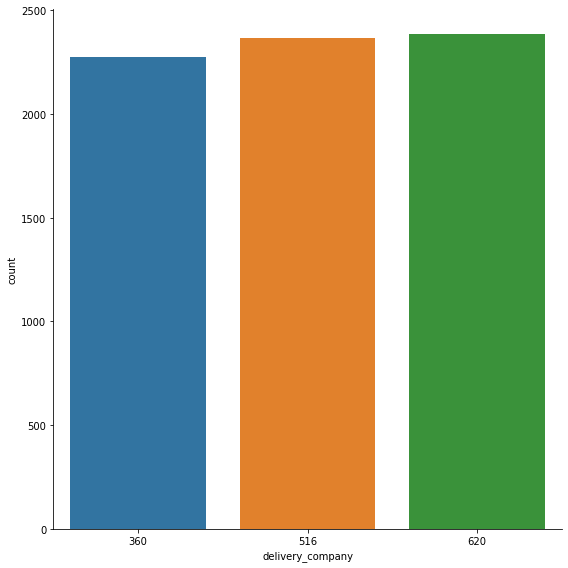

In [266]:
sbn.catplot(data=purchasesDF, kind='count', x='delivery_company', height=8)

Na podstawie powyższego histogramu widzimy, że firmy maja praktycznie idenyczne obciążenie. Jest to przesłanka za tym, że dane są reprezentatywne, warto by sprawdzić, czy również w obrębie poszczególnych miast sytuacja wygląda tak samo. To sprawdzenie odroczymy do czasu scalenia danych.

![alt text](images/krakow-firmy.png "Kraków")  ![alt text](images/wroclaw-firmy.png "Wrocław")  
![alt text](images/gdynia-firmy.png "Gdynia")  ![alt text](images/warszawa-firmy.png "Warszawa")  

Sprawdziliśmy, czy obciążenie firm w zależności od miasta jest równe. Okazuje się, że tak. (Wykresy, tylko dla wybranych miast, dla przejrzystości.)

Analiza **delivery_timestamp**, **purchase_timestamp**

Dodamy nowe pole informacyjne **delivery_time** będące różnicą **purchase_timestamp** i **delivery_timestamp**, **week_day** informujący o dniu tygodnia [0, 6] oraz **purchase_week_day_plus_hour** przedstawiający "godzinę tygodnia" liczoną od poniedziałku 0:00

In [267]:
import dateutil.parser as dt
delivery_time = [0 for i in range(0, len(purchasesDF.index))]
week_day = [0 for i in range(0, len(purchasesDF.index))]
purchase_week_day_plus_hour = [0 for i in range(0, len(purchasesDF.index))]

for index, row in purchasesDF.iterrows():
    end = row['delivery_timestamp']
    beg = row['purchase_timestamp']
    
    week_day[index] = dt.isoparse(beg).weekday()

    purchase_week_day_plus_hour[index] = week_day[index]*24 + dt.isoparse(beg).hour
    
    time = dt.isoparse(end) - dt.isoparse(beg)
    time = time.days * 24 + time.seconds / 3600
    delivery_time[index] = time

purchasesDF_processed = purchasesDF.copy()
purchasesDF_processed['delivery_time'] = delivery_time
purchasesDF_processed['week_day'] = week_day
purchasesDF_processed['purchase_week_day_plus_hour'] = purchase_week_day_plus_hour

purchasesDF_processed.head(n=5)

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,delivery_time,week_day,purchase_week_day_plus_hour
0,20001,2021-09-20T14:30:28,2021-09-22T08:36:20.150497,360,42.097778,0,14
1,20002,2021-03-05T13:27:41,2021-03-08T08:00:32.317562,620,66.547500,4,109
2,20003,2021-07-28T13:44:26,2021-07-30T12:01:54.224889,360,46.291111,2,61
3,20004,2021-09-01T18:54:49,2021-09-03T08:09:57.431414,360,37.252222,2,66
4,20005,2021-09-11T12:33:54,2021-09-13T08:42:19.687349,360,44.140278,5,132


Sprawdźmy, jaki jest rozkład czasu dostawy dla każdego dnia tygodnia.

poniedziałek


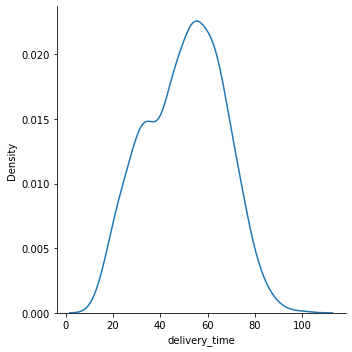

In [268]:
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==0], x='delivery_time', kind='kde')
print("poniedziałek")


wtorek


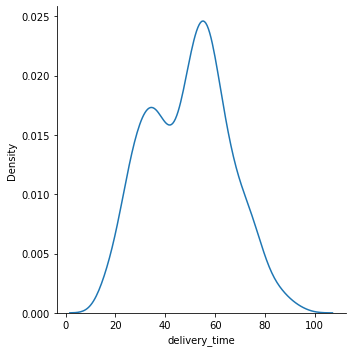

In [269]:
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==1], x='delivery_time', kind='kde')
print('wtorek')

środa


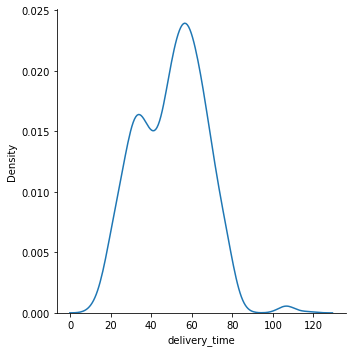

In [270]:
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==2], x='delivery_time', kind='kde')
print("środa")

czwartek


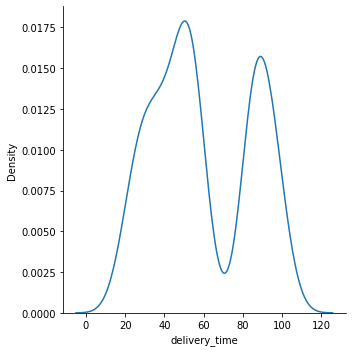

In [271]:
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==3], x='delivery_time', kind='kde')
print("czwartek")

piątek


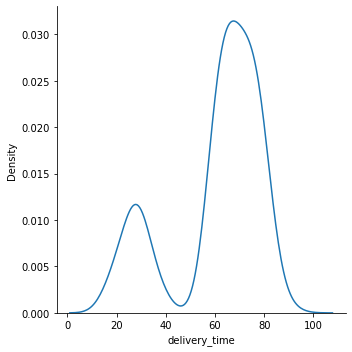

In [272]:
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==4], x='delivery_time', kind='kde')
print("piątek")

sobota


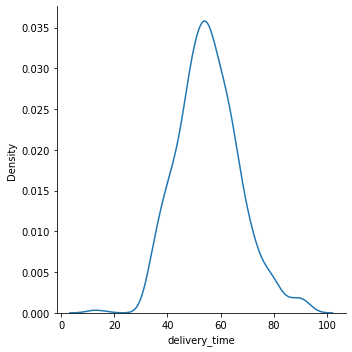

In [273]:
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==5], x='delivery_time', kind='kde')
print("sobota")

niedziela


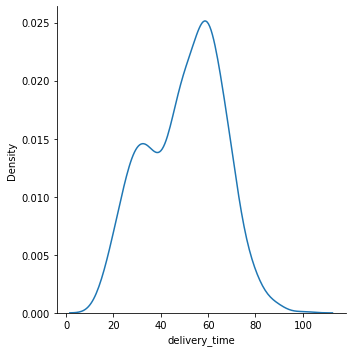

In [274]:
sbn.displot(data=purchasesDF_processed[purchasesDF_processed.week_day==6], x='delivery_time', kind='kde')
print("niedziela")

Text(0.5, 1.0, 'Delivery time by day of the week (0-mon, 6-sun)')

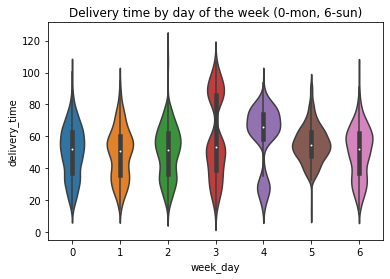

In [275]:
days_plot=sbn.violinplot(data=purchasesDF_processed, x='week_day', y='delivery_time')
days_plot.set_title("Delivery time by day of the week (0-mon, 6-sun)")

Rozkłady żadnego z dni nie są normalne. Możemy zauważyć, że począwszy od poniedziałku 'szczyt' wykresu przesuwa się ku prawej stronie, czyli ku dłuższym czasom przesyłki.
Może to wynikać z faktu, że weekendy zwykle nie są traktowane jako dni robocze, co przedłuża przesyłkę. Okres oczekiwania skraca się w miarę dochodzenia do końca tygodnia
ponieważ, kończy się weekend. Warto wziąć to pod uwagę.

Analiza **purchase_week_day_plus_hour**

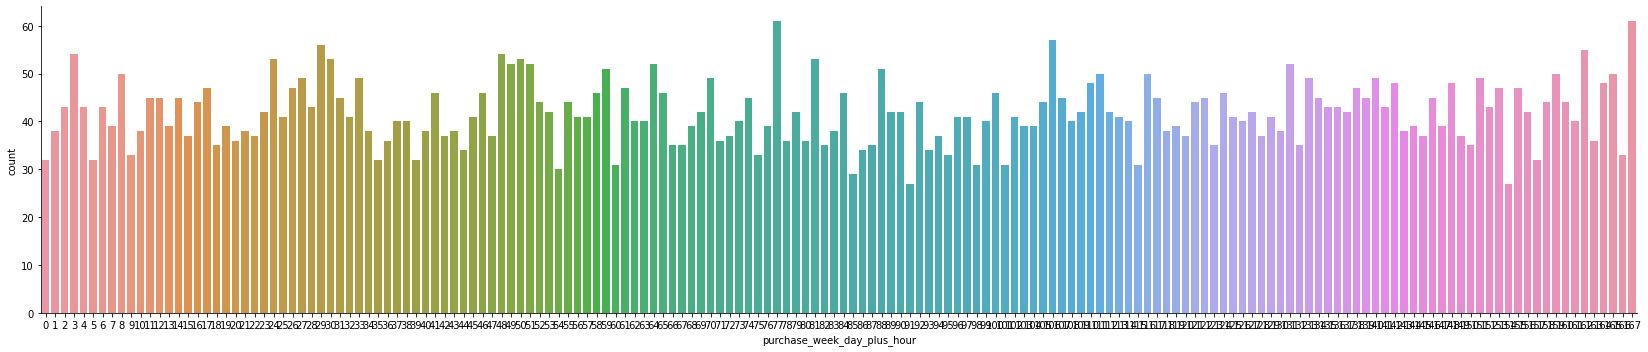

In [276]:
sbn.catplot(data=purchasesDF_processed, x='purchase_week_day_plus_hour', kind='count', aspect= 4.6)

Dane mają rozkład równomierny (zakupy są robione przez cały w każej "godzinie tygdania" z podobną częstotliwością).

## Analiza sesji

In [277]:
sessionsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37614 entries, 0 to 37613
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   session_id        37614 non-null  int64         
 1   timestamp         37614 non-null  datetime64[ns]
 2   user_id           37614 non-null  int64         
 3   product_id        37614 non-null  int64         
 4   event_type        37614 non-null  object        
 5   offered_discount  37614 non-null  int64         
 6   purchase_id       7031 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 2.0+ MB


Dane są kompletne z wyjątkiem atrybutu **purchase_id**. Sprawdźmy, co jest tego przyczyną.

Sprawdźmy jakie wartości występują w kolumnie **event_type**.

In [278]:
sessionsDF.event_type.value_counts()

VIEW_PRODUCT    30583
BUY_PRODUCT      7031
Name: event_type, dtype: int64

Rekordy sesji możemy podzielić na reprezentujące akcję oglądania produktu (**VIEW_PRODUCT**) oraz zakupu (**BUY_PRODUCT**).
Warto zauważyć, że ilość rekordów **BUY_PRODUCT** zgadza się z ilością rekordów w **purchases.jsonl**.
Historia przeglądnia nie wpływa na czas dostawy, więc postanawiamy nie brać pod uwagę tych rekordów w dalszej części analizy.

In [279]:
sessionsDF_processed = sessionsDF[sessionsDF.event_type == 'BUY_PRODUCT']

sessionsDF_processed.head(n=5)

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
1,124,2021-09-20 14:30:28,102,1318,BUY_PRODUCT,0,20001.0
10,126,2021-03-05 13:27:41,102,1318,BUY_PRODUCT,20,20002.0
15,127,2021-07-28 13:44:26,102,1081,BUY_PRODUCT,0,20003.0
18,128,2021-09-01 18:54:49,102,1233,BUY_PRODUCT,10,20004.0
28,129,2021-09-11 12:33:54,102,1030,BUY_PRODUCT,0,20005.0


Analiza **session_id**

In [280]:
print('max id : {}'.format(sessionsDF_processed['session_id'].max()))
print('min id : {}'.format(sessionsDF_processed['session_id'].min()))
print('unique ids : {}/{}'.format(sessionsDF_processed['session_id'].nunique(), sessionsDF_processed['session_id'].size))

max id : 10015
min id : 124
unique ids : 7031/7031


Brak duplikatów id, oznacza to, że w ciągu każdej sesji zakupiono tylko jeden produkt.

**user_id**, **product_id**, **purchase_id**  zostały już przeanalizowane wcześniej. Zgodność między poszczególnymi id w różnych plikach będziemy mogli sprawdzić po scaleniu pików w jeden zaagregowany zbiór danych. Jeżeli zastosujemy inner join, zostaną wycięte te rekordy, które nie mają odpowiadających rekordów w zbiorze z którym  się skleja. Będzie to oznaczać, że zbiory danych nie były ze sobą spójne.

**offered_discout** nie wydaje się być niezbędnym atrybutem dla naszego modelu, więc pomijamy jego  analizę.

**timestamp** porównamy z polem **purchase_timestap** po scaleniu.
Ale przed tym sprawdzimy, jak rozłożone w czasie są operacje **BUY_PRODUCT**.

In [281]:
groupDays = sessionsDF_processed.groupby(pd.Grouper(key='timestamp', sort=True, freq='1D', axis=0))

print("distinct days with a purchase : {}".format(len(groupDays.count())))

distinct days with a purchase : 300


Pierwszy dzień "zakupów"

In [282]:
groupDays.count().head(n=1).head(n=1)


,session_id,user_id,product_id,event_type,offered_discount,purchase_id
timestamp,,,,,,
2021-01-01,26,26,26,26,26,26


Ostatni dzień "zakupów"

In [283]:
groupDays.count().tail(n=1)

,session_id,user_id,product_id,event_type,offered_discount,purchase_id
timestamp,,,,,,
2021-10-27,23,23,23,23,23,23


Z tego grupowania wynika, że zakupy dane pokrywaja okres od 2021-01-01 do 2021-10-27.
Na obecną chwilę brakuje informacji o zakupach wykonywanych w listopadzie i grudniu. 

## Scalenie danych

In [284]:
aggregatedDF = pd.merge(sessionsDF_processed, usersDF, how='inner', on='user_id')
aggregatedDF = pd.merge(aggregatedDF, productsDF_processed, how='inner', on='product_id')
aggregatedDF = pd.merge(aggregatedDF, purchasesDF_processed, how='inner', on='purchase_id')
aggregatedDF.head(n=2)


,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,name,city,street,product_name,category_path,price,purchase_timestamp,delivery_timestamp,delivery_company,delivery_time,week_day,purchase_week_day_plus_hour
0,124,2021-09-20 14:30:28,102,1318,BUY_PRODUCT,0,20001.0,Ernest Zacharek,Radom,ul. Bukowa 64,Plantronics Savi W710,Sprzęt RTV,553.0,2021-09-20T14:30:28,2021-09-22T08:36:20.150497,360,42.097778,0,14
1,126,2021-03-05 13:27:41,102,1318,BUY_PRODUCT,20,20002.0,Ernest Zacharek,Radom,ul. Bukowa 64,Plantronics Savi W710,Sprzęt RTV,553.0,2021-03-05T13:27:41,2021-03-08T08:00:32.317562,620,66.547500,4,109


In [285]:
print("record  after/before  merge :  {}/{}".format(len(aggregatedDF), len(sessionsDF_processed)))

record  after/before  merge :  7031/7031


Dane są spójne.

In [286]:
aggregatedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7030
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   session_id                   7031 non-null   int64         
 1   timestamp                    7031 non-null   datetime64[ns]
 2   user_id                      7031 non-null   int64         
 3   product_id                   7031 non-null   int64         
 4   event_type                   7031 non-null   object        
 5   offered_discount             7031 non-null   int64         
 6   purchase_id                  7031 non-null   float64       
 7   name                         7031 non-null   object        
 8   city                         7031 non-null   object        
 9   street                       7031 non-null   object        
 10  product_name                 7031 non-null   object        
 11  category_path                7031 non-null 

Mamy 17 atrybutów. Tak jak to było wcześniej wspomniane, nie wszystkie atrybuty są konieczne dla dalszej analizy.
Powinniśmy oczścić zbiór danych.

Sprawdźmy czy **timestamp** zgadza się z  **purchase_timestamp**, a następnie pozbędziemy się kolumny **timestamp**.

In [287]:
inconsistences = []
from datetime import datetime as dt

for index, row in aggregatedDF.iterrows():
    if row.timestamp.to_pydatetime() != dt.strptime(row.purchase_timestamp.replace("T", " "), "%Y-%m-%d %H:%M:%S"):
        inconsistences.append(index)
    

print(f"ilość nieścisłości : {len(inconsistences)}")


ilość nieścisłości : 0


## Oczyszczenie atrybutów

Pozbędziemy się atrybutów, które naszym zdaniem nie wnoszą żadnej informacji do modelu. Uzasdnijmy nasz wybór:

- wszystkie pola z sufiksem **_id** z wyjątkiem **session_id**  są indentyfikatorami, które po scaleniu danych są nieprzydatne
- **timestamp** jest duplikatem **purchase_timestamp**
- **offered_discount** nie powinien mieć nic wspólnego z czasem dostawy (przynajmniej tak podpowiada zdrowy rozsądek)
- po odfiltrowaniu rekordów opisujących przeglądnie produktów **event_type** nie jest już przydatny
- generalnie imię użytkownika nie powinno rzutować na czas dostawy, **name** wydaje się być zbędny

In [288]:
clearedDF = aggregatedDF.drop(columns=["product_id", "purchase_id", "timestamp", "offered_discount", "event_type", "name"])

clearedDF.head(n=2)

,session_id,user_id,city,street,product_name,category_path,price,purchase_timestamp,delivery_timestamp,delivery_company,delivery_time,week_day,purchase_week_day_plus_hour
0,124,102,Radom,ul. Bukowa 64,Plantronics Savi W710,Sprzęt RTV,553.0,2021-09-20T14:30:28,2021-09-22T08:36:20.150497,360,42.097778,0,14
1,126,102,Radom,ul. Bukowa 64,Plantronics Savi W710,Sprzęt RTV,553.0,2021-03-05T13:27:41,2021-03-08T08:00:32.317562,620,66.547500,4,109


## Analiza scalonych danych

Interesującym jest to jak radzą sobie poszczególne firmy w zależności od miasta. Z wcześniejszej analizy wiemy, że mają praktycznie taki sam 
'ruch' w każdym z miast.

Text(0.5, 1.0, 'Delivery time by city for company 620')

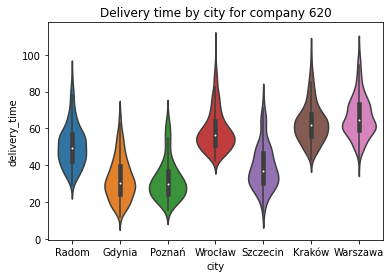

In [289]:
cityOrder = ['Radom', 'Gdynia', 'Poznań', 'Wrocław',  'Szczecin', 'Kraków', 'Warszawa']

cmp620_plot = sbn.violinplot(data=clearedDF[clearedDF.delivery_company == 620], x='city', y='delivery_time', order=cityOrder)
cmp620_plot.set_title("Delivery time by city for company 620")


Text(0.5, 1.0, 'Delivery time by city for company 360')

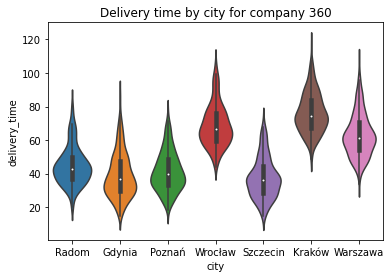

In [290]:
cmp560_plot = sbn.violinplot(data=clearedDF[clearedDF.delivery_company == 360], x='city', y='delivery_time', order=cityOrder)
cmp560_plot.set_title("Delivery time by city for company 360")

Text(0.5, 1.0, 'Delivery time by city for company 516')

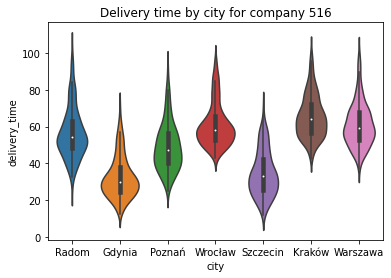

In [291]:
cmp516_plot = sbn.violinplot(data=clearedDF[clearedDF.delivery_company == 516], x='city', y='delivery_time', order=cityOrder)
cmp516_plot.set_title("Delivery time by city for company 516")

Widzimy, że wykresy dla każdej z firm mają podobną charakterystkę. W większości przypadków mediany mają podobne wartości.
Trochę różnorodności dodają parametry poszczególnych "skrzypiec", ich szerokość, długość itd. 

Najszybszymi dostawami cieszą się klienci z Gdyni. Każda z firm ma najktórszy czas dostawy właśnie dla tej miejscowości.
Średnio najdłużej oczekują mieszkańcy Krakowa, Warszawy oraz Wrocławia.

Może firma ESzopping powinna zastanowić się nad zmianą, lub urozmaiceniem zbioru firm kurierskich z którymi współpracują,
tak aby zapewnić lepszy czas dostaw w wyżej wymienionych miastach.

Sprawdźmy, czy tym produktu wpływa na czas jego dostawy. Kategoria w większości przypadków ma wpływ na gabaryty urządzenia.
Zwykle komputer, czy telewizor jest większy, a więc i trudniejszy w przygotowaniu do wysyłki i transporcie niż mp4 lub telefon komórkowy.


Text(0.5, 1.0, 'Delivery time category')

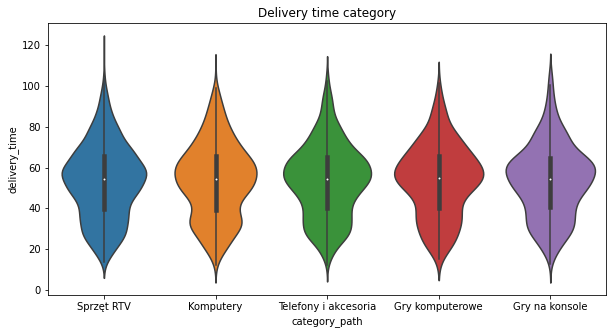

In [292]:
plt.figure(figsize=(10, 5))
category_plot = sbn.violinplot(data=clearedDF, x='category_path', y='delivery_time')
category_plot.set_title("Delivery time category")


Rozkłady są niemal identyczne, wygląda, że kategoria sprzętu prawie nie wpływa na czas jego dostawy.

## Współczynnik informacji wzajemnej

Rzutujemy czas dostawy z double na integer.

Sprawdźmy, czy atrbuty niosą ze sobą jakąś informację o zmiennej celu.
Przed wyliczeniem współczynnika dla poszczególnych zbiorów, sprawdzimy wartość entropii zbioru delivery_time, aby oszacować 
jaka może być maksymalna wartość MI. 

MI(X,Y) >= 0 <br/>
MI(X,Y) = H(X) - H(X|Y)

In [293]:
from sklearn import metrics
from scipy.stats import entropy

def castInt(delivery_time):
    return int(delivery_time)

clearedDF_delivery_time_int = clearedDF['delivery_time'].apply(castInt)
clearedDF_price_to_int = clearedDF['price'].apply(castInt)

clearedDF['delivery_time'] = clearedDF_delivery_time_int
clearedDF['price'] = clearedDF_price_to_int

print("Entropy of delivery_time =                       " + str(round(entropy(clearedDF['delivery_time'].value_counts()),4)))

print("MI(delivery_time, delivery_company) =            " + str(round(metrics.mutual_info_score(clearedDF['delivery_time'], clearedDF['delivery_company']),4)))
print("MI(delivery_time, week_day) =                    " + str(round(metrics.mutual_info_score(clearedDF['delivery_time'], clearedDF['week_day']),4)))
print("MI(delivery_time, city) =                        " + str(round(metrics.mutual_info_score(clearedDF['delivery_time'], clearedDF['city']),4)))
print("MI(delivery_time, product_name) =                " + str(round(metrics.mutual_info_score(clearedDF['delivery_time'], clearedDF['product_name']),4)))
print("MI(delivery_time, category_path) =               " + str(round(metrics.mutual_info_score(clearedDF['delivery_time'], clearedDF['category_path']),4)))
print("MI(delivery_time, street) =                      " + str(round(metrics.mutual_info_score(clearedDF['delivery_time'], clearedDF['street']),4)))
print("MI(delivery_time, price) =                       " + str(round(metrics.mutual_info_score(clearedDF['delivery_time'], clearedDF['price']),4)))
print("MI(delivery_time, user_id) =                     " + str(round(metrics.mutual_info_score(clearedDF['delivery_time'], clearedDF['user_id']),4)))
print("MI(delivery_time, purchase_week_day_plus_hour) = " + str(round(metrics.mutual_info_score(clearedDF['delivery_time'], clearedDF['purchase_week_day_plus_hour']),4)))


Entropy of delivery_time =                       4.2762
MI(delivery_time, delivery_company) =            0.0318
MI(delivery_time, week_day) =                    0.249
MI(delivery_time, city) =                        0.4266
MI(delivery_time, product_name) =                0.4659
MI(delivery_time, category_path) =               0.0279
MI(delivery_time, street) =                      1.1045
MI(delivery_time, price) =                       0.3639
MI(delivery_time, user_id) =                     1.1045
MI(delivery_time, purchase_week_day_plus_hour) = 1.851


Atrybuty mające wpływ na czas dostawy wg kryterium MI to :

- week_day
- city
- product_name
- street (user_id)
- price
- purchase_hour
- purchase_week_day_plus_hour

**street**(**user_id**) ma wysoki wynik ponieważ czas dostawy do danego użytkownika wydaje się korespondować z danym użytkownikiem.

**purchase_week_day_plus_hour** odgrywa kluczową role w analizowanych atrybutach, co zgadza się z naszymi przewidywaniami.

Atrybuty nie mające wpływu na czas dostawy wg kryterium MI to :
- delivery_company 
- category_path

**delivery_company** oraz **category_path** nie dziwi ponieważ, już wcześniej wykryliśmy, że rodzaj firmy nie wpływa na czas dostawy.
Wydaje się jednak, że te wartości powinny mieć wpływ na czas dostawy. Może to świadczyć o tym, że dane nie są poprawne.



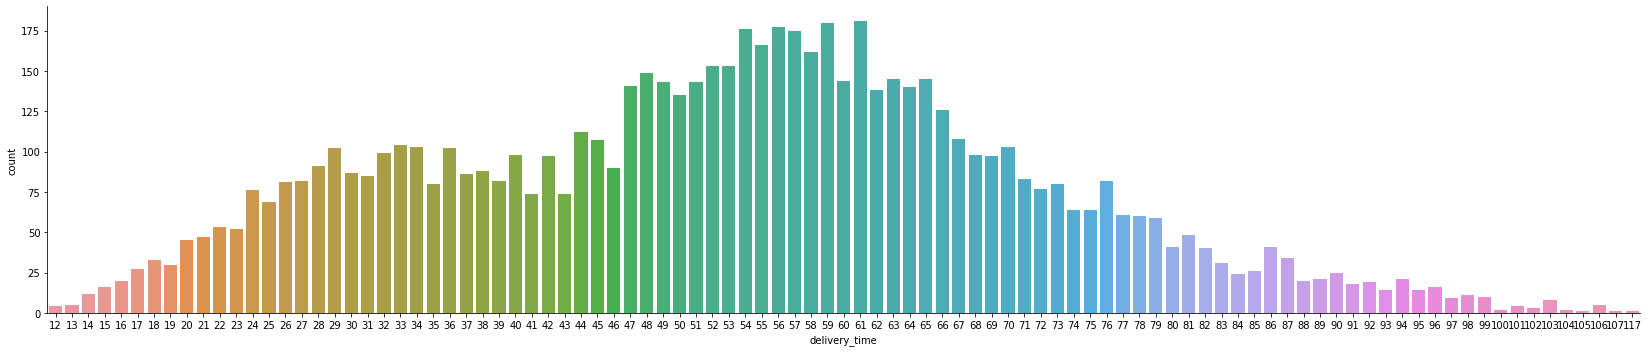

In [294]:
sbn.catplot(data=clearedDF, x='delivery_time', kind='count', aspect= 4.6)

Jako, że planujemy stworzyć klasyfikator przypisujące klasy:
1 dzień, 2 dni, 3 dni, 4 dni, 5 dni i dłużej

Sprawdźmy jak takie rzutowanie wpłynie na nasze dane.

In [295]:
from scipy.stats import entropy

import math

def cast_time(time):

    days = time / 24
    days = math.ceil(days)

    if  days < 5:
        return days

    return 5

delivery_time_to_class = clearedDF["delivery_time"].apply(cast_time)
casted_clearedDF = clearedDF.copy()
casted_clearedDF["delivery_time"] =  delivery_time_to_class
casted_clearedDF.to_json(r'..\data\processed\casted_clearedDF.jsonl', orient="records", lines=True)

3    3348
2    2283
4     923
1     420
5      57
Name: delivery_time, dtype: int64


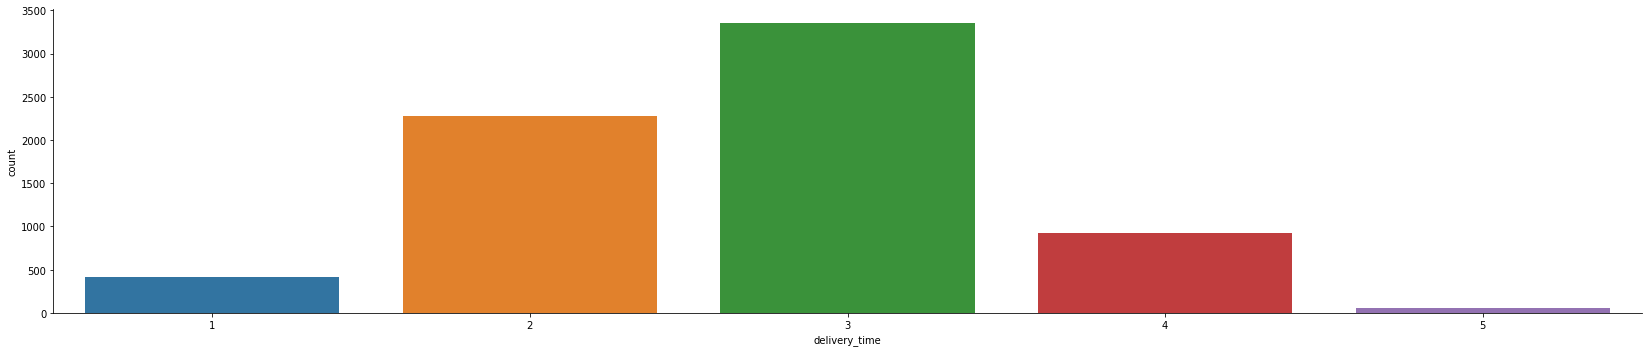

In [296]:
sbn.catplot(data=casted_clearedDF, x='delivery_time', kind='count', aspect= 4.6)
print(delivery_time_to_class.value_counts())

Sprawdźmy jak rzutowanie wpłyneło na entropię oraz MI.

In [297]:
print("Entropy of delivery_time =                       " + str(round(entropy(casted_clearedDF['delivery_time'].value_counts()),4)))

print("MI(delivery_time, delivery_company) =            " + str(round(metrics.mutual_info_score(casted_clearedDF['delivery_time'], casted_clearedDF['delivery_company']),4)))
print("MI(delivery_time, week_day) =                    " + str(round(metrics.mutual_info_score(casted_clearedDF['delivery_time'], casted_clearedDF['week_day']),4)))
print("MI(delivery_time, city) =                        " + str(round(metrics.mutual_info_score(casted_clearedDF['delivery_time'], casted_clearedDF['city']),4)))
print("MI(delivery_time, product_name) =                " + str(round(metrics.mutual_info_score(casted_clearedDF['delivery_time'], casted_clearedDF['product_name']),4)))
print("MI(delivery_time, category_path) =               " + str(round(metrics.mutual_info_score(casted_clearedDF['delivery_time'], casted_clearedDF['category_path']),4)))
print("MI(delivery_time, street) =                      " + str(round(metrics.mutual_info_score(casted_clearedDF['delivery_time'], casted_clearedDF['street']),4)))
print("MI(delivery_time, price) =                       " + str(round(metrics.mutual_info_score(casted_clearedDF['delivery_time'], casted_clearedDF['price']),4)))
print("MI(delivery_time, user_id) =                     " + str(round(metrics.mutual_info_score(casted_clearedDF['delivery_time'], casted_clearedDF['user_id']),4)))
print("MI(delivery_time, purchase_week_day_plus_hour) = " + str(round(metrics.mutual_info_score(casted_clearedDF['delivery_time'], casted_clearedDF['purchase_week_day_plus_hour']),4)))

Entropy of delivery_time =                       1.1925
MI(delivery_time, delivery_company) =            0.0116
MI(delivery_time, week_day) =                    0.0802
MI(delivery_time, city) =                        0.3088
MI(delivery_time, product_name) =                0.02
MI(delivery_time, category_path) =               0.0012
MI(delivery_time, street) =                      0.3469
MI(delivery_time, price) =                       0.0152
MI(delivery_time, user_id) =                     0.3469
MI(delivery_time, purchase_week_day_plus_hour) = 0.2567


Entropia zmalała prawie 4 krotnie.

- MI dla **week_day** zmalała proporcjonalnie
- MI dla **city** się nie zmieniło, atrybut wydaje się być dość dobrym predyktorem.
- MI dla **product_name** zmalało
- MI dla **category_path**  bez zmian.
- MI dla **user_id**(**street**) zmalało proprocjonalnie
- MI dla **price** zmalało.
- MI dla **purchase_week_day_plus_hour** zmalało.
 


# Podsumowanie


Podejrzenia o braku poprawności danych budzi mała informacja wzajemna atrybutu delivery_company jednak może to być ich specyfika.

Przydatnym atrybutem była by informacja o rejonie miasta do którego była realizowana dostawa. Wnioskując po informacji wzajemnej atrybutu user_id(street) mogło by to być dobrym i uniwersalnym predykatem.

Po przeskalowaniu zwróciliśmy uwagę na spadek wartości MI dla większości atrybutów. Nasze zadanie modelowania to zadanie klasyfikacji, taka utrata wskaźnika MI jest niepokojąca i może sugerować błąd w danych. Jeśli to możliwe to prosimy o nowy zbiór danych natomiast jeśli dane są poprawne to rozważymy zmianę modelu na model regresji, ponieważ wartości wskaźnika MI były wyższe dla zmiennej celu niezrzutowanej do klasy.

Przy braku innych danych zdecydowalibyśmy się, jako danych wejściowych, użyć atrybutów:
- city
- street (dla nowych użytkowników predykcje będą gorsze. Z kolejnymi zakupami będą się polepszać)
- purchase_week_day_plus_hour

Zmienną celu byłby czas dostawy w dniach.

